# MountainCarContinuous-v0
---
In this notebook, you will implement a DDPG agent with OpenAI Gym's MountainCarContinuous-v0 environment.

### 1. Import the Necessary Packages

In [1]:
import gym.spaces
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Agent import Agent

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

Device:  cuda:0


### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [13]:
random_seed = 2

env = gym.make('MountainCarContinuous-v0')
env.seed(random_seed)

# size of each action
action_size = env.action_space.shape[0]
print('Size of each action:', action_size)

# examine the state space 
state_size = env.observation_space.shape[0]
print('Size of state:', state_size)

action_low = env.action_space.low
print('Action low:', action_low)

action_high = env.action_space.high
print('Action high: ', action_high)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Size of each action: 1
Size of state: 2
Action low: [-1.]
Action high:  [1.]


### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

In [3]:
from itertools import count
import time

agent = Agent(state_size=state_size, action_size=action_size, random_seed=random_seed)

In [4]:
def save_model():
    print("Model Save...")
    torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
    torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')

Episode 1, Average Score: -79.87, Max: -79.87, Min: -79.87, Time: 2.52
Episode 2, Average Score: -79.37, Max: -79.37, Min: -79.87, Time: 2.35
Episode 3, Average Score: -80.99, Max: -79.37, Min: -80.99, Time: 2.24
Episode 4, Average Score: -78.94, Max: -78.94, Min: -80.99, Time: 2.25
Episode 5, Average Score: -79.16, Max: -78.94, Min: -80.99, Time: 2.32
Episode 6, Average Score: -80.36, Max: -78.94, Min: -80.99, Time: 2.27
Episode 7, Average Score: -78.84, Max: -78.84, Min: -80.99, Time: 2.26
Episode 8, Average Score: -75.65, Max: -75.65, Min: -80.99, Time: 2.28
Episode 9, Average Score: -77.64, Max: -75.65, Min: -80.99, Time: 2.26
Episode 10, Average Score: -78.36, Max: -75.65, Min: -80.99, Time: 2.28
Episode 11, Average Score: -78.41, Max: -75.65, Min: -80.99, Time: 2.34
Episode 12, Average Score: 35.08, Max: 35.08, Min: -80.99, Time: 1.90
Episode 13, Average Score: -82.47, Max: 35.08, Min: -82.47, Time: 2.24
Episode 14, Average Score: -79.99, Max: 35.08, Min: -82.47, Time: 2.26
Episo

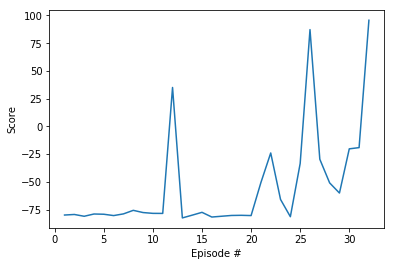

In [5]:
def ddpg(n_episodes=100000, max_t=1500, print_every=1, save_every=20):
    scores_deque = deque(maxlen=print_every)
    scores = []
    
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        score = 0
        timestep = time.time()
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done, t)
            score += reward
            state = next_state            
            if done:
                break 
                
        scores_deque.append(score)
        scores.append(score)
        score_average = np.mean(scores_deque)
        
        if i_episode % save_every == 0:
            save_model()
        
        if i_episode % print_every == 0:
            print('\rEpisode {}, Average Score: {:.2f}, Max: {:.2f}, Min: {:.2f}, Time: {:.2f}'\
                  .format(i_episode, score_average, np.max(scores), np.min(scores), time.time() - timestep), end="\n")
                    
        if np.mean(scores_deque) >= 90.0:            
            save_model()
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, score_average))            
            break            
            
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [14]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

for _ in range(5):
    state = env.reset()
    for t in range(1200):
        action = agent.act(state, add_noise=False)
        env.render()
        state, reward, done, _ = env.step(action)
        if done:
            break 

env.close()